## Scrapy Data Analysis

In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re, os
%matplotlib inline

# I. Load and combine csv files

In [2]:
a ='tttttaaaaaa'
re.search('\D+', 'queens1')[0]

'queens'

In [4]:
# combine all files together

import os
filenames = os.listdir("./")
file_all = pd.DataFrame()

for name in filenames[2:-1]:
    file = name.split('_')[1][:-4]
    county = re.search('\D+', file)[0]
    print(name)
    file = pd.read_csv(name, thousands=',')
    file['county'] = county
    file_all = pd.concat([file_all, file]) 
    
file_all.head(3)


realtor_Bronx.csv
realtor_Kings1.csv
realtor_Kings2.csv
realtor_Nassau.csv
realtor_Queens1.csv
realtor_Queens2.csv
realtor_Queens3.csv
realtor_Richmond.csv
realtor_Suffolk1.csv
realtor_Suffolk2.csv


,address,bathroom,bedroom,city,detailslink,floorsize,lotsize,lotunit,propertyType,propertyid,soldDate,soldPrice,state,zipcode,county
0,3750 Hudson Manor Ter Apt 6GE,2,2.0,Bronx,/realestateandhomes-detail/3750-Hudson-Manor-T...,1200.0,NaN,NaN,Condo/Townhome/Row Home/Co-Op,4718175844,"July 25, 2017","$277,500",NY,10463,Bronx
1,4747 Matilda Ave,2,3.0,Bronx,/realestateandhomes-detail/4747-Matilda-Ave_Br...,1488.0,3300.0,sq ft lot,Single Family Home,3494978238,"July 24, 2017","$450,000",NY,10470,Bronx
2,987 Pierce Ave,2,3.0,Bronx,/realestateandhomes-detail/987-Pierce-Ave_Bron...,1370.0,1518.0,sq ft lot,Multi-Family Home,4651290572,"July 23, 2017","$479,000",NY,10462,Bronx


## Save your files

In [5]:
file_all.to_csv('./file_all_single.csv')
df = file_all

## Check columns

In [6]:
df.columns

Index(['address', 'bathroom', 'bedroom', 'city', 'detailslink', 'floorsize',
       'lotsize', 'lotunit', 'propertyType', 'propertyid', 'soldDate',
       'soldPrice', 'state', 'zipcode', 'county'],
      dtype='object')

In [7]:
df.shape


(28069, 15)

## Correct columns types

In [8]:
# correct bathroom number, 2+ to 2.5
df.bathroom = df.bathroom.str.replace('+','.5')

In [10]:
df.head(2)

,address,bathroom,bedroom,city,detailslink,floorsize,lotsize,lotunit,propertyType,propertyid,soldDate,soldPrice,state,zipcode,county
0,3750 Hudson Manor Ter Apt 6GE,2,2.0,Bronx,/realestateandhomes-detail/3750-Hudson-Manor-T...,1200.0,NaN,NaN,Condo/Townhome/Row Home/Co-Op,4718175844,"July 25, 2017","$277,500",NY,10463,Bronx
1,4747 Matilda Ave,2,3.0,Bronx,/realestateandhomes-detail/4747-Matilda-Ave_Br...,1488.0,3300.0,sq ft lot,Single Family Home,3494978238,"July 24, 2017","$450,000",NY,10470,Bronx


In [11]:
# convert soldprice to interger
df.soldPrice = df.soldPrice.str[1:].str.replace(',','').astype(int)

In [12]:
# trim space in lotunit
df.lotunit = df.lotunit.str.strip(' ')

In [13]:
# drop the duplicated rows by propid
df = df.drop_duplicates('propertyid', inplace=False)  

In [14]:
# convert soldDate to Date 
from dateutil.parser import parse
#from datetime import date
#df.soldDate[1]
#print(parse(df.soldDate[1]))
df.soldDate = df.soldDate.apply(parse)
#.strftime('%d/%m/%Y')


/Users/wanggene/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
df.to_csv('./file_all_single_corrected.csv')
# reset the index

#df = df.reset_index()
#df = df.set_index('propertyid')
#df.iloc[:,1: ]

df_backup = df.copy()
# next time you can load df_backup

In [16]:
# filter price from $200,000 to $2,000,000
df = df[(df.soldPrice >= 200000) & (df.soldPrice <= 2000000)]
df.head(3)

,address,bathroom,bedroom,city,detailslink,floorsize,lotsize,lotunit,propertyType,propertyid,soldDate,soldPrice,state,zipcode,county
0,3750 Hudson Manor Ter Apt 6GE,2,2.0,Bronx,/realestateandhomes-detail/3750-Hudson-Manor-T...,1200.0,NaN,NaN,Condo/Townhome/Row Home/Co-Op,4718175844,2017-07-25,277500,NY,10463,Bronx
1,4747 Matilda Ave,2,3.0,Bronx,/realestateandhomes-detail/4747-Matilda-Ave_Br...,1488.0,3300.0,sq ft lot,Single Family Home,3494978238,2017-07-24,450000,NY,10470,Bronx
2,987 Pierce Ave,2,3.0,Bronx,/realestateandhomes-detail/987-Pierce-Ave_Bron...,1370.0,1518.0,sq ft lot,Multi-Family Home,4651290572,2017-07-23,479000,NY,10462,Bronx


In [99]:
# df = df_backup

In [17]:
# convert lotsize from acres to sq ft, lotsize * 43560
df.ix[df.lotunit == 'acres lot', 'lotsize'] = df.ix[df.lotunit == 'acres lot', 'lotsize'] *43560

/Users/wanggene/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [18]:
df['realtor']='sold_property'

In [19]:
df.head()

,address,bathroom,bedroom,city,detailslink,floorsize,lotsize,lotunit,propertyType,propertyid,soldDate,soldPrice,state,zipcode,county,realtor
0,3750 Hudson Manor Ter Apt 6GE,2,2.0,Bronx,/realestateandhomes-detail/3750-Hudson-Manor-T...,1200.0,NaN,NaN,Condo/Townhome/Row Home/Co-Op,4718175844,2017-07-25,277500,NY,10463,Bronx,sold_property
1,4747 Matilda Ave,2,3.0,Bronx,/realestateandhomes-detail/4747-Matilda-Ave_Br...,1488.0,3300.0,sq ft lot,Single Family Home,3494978238,2017-07-24,450000,NY,10470,Bronx,sold_property
2,987 Pierce Ave,2,3.0,Bronx,/realestateandhomes-detail/987-Pierce-Ave_Bron...,1370.0,1518.0,sq ft lot,Multi-Family Home,4651290572,2017-07-23,479000,NY,10462,Bronx,sold_property
3,988 Findlay Ave,4,6.0,Bronx,/realestateandhomes-detail/988-Findlay-Ave_Bro...,3382.0,2015.0,sq ft lot,Multi-Family Home,3026948968,2017-07-21,600000,NY,10456,Bronx,sold_property
4,2440 Laconia Ave,3,5.0,Bronx,/realestateandhomes-detail/2440-Laconia-Ave_Br...,2850.0,3742.0,sq ft lot,Multi-Family Home,3788194897,2017-07-21,790000,NY,10469,Bronx,sold_property


# II. load saved csv file

## 2.1 load file

In [2]:
#df.to_csv('./file_all_single_corrected.csv')
df = pd.read_csv('./file_all_single_corrected.csv', index_col=0, na_values='NaN')
df.head()

,address,bathroom,bedroom,city,detailslink,floorsize,lotsize,lotunit,propertyType,propertyid,soldDate,soldPrice,state,zipcode,county,realtor
0,3750 Hudson Manor Ter Apt 6GE,2.0,2.0,Bronx,/realestateandhomes-detail/3750-Hudson-Manor-T...,1200.0,NaN,NaN,Condo/Townhome/Row Home/Co-Op,4718175844,2017-07-25,277500,NY,10463,Bronx,sold_property
1,4747 Matilda Ave,2.0,3.0,Bronx,/realestateandhomes-detail/4747-Matilda-Ave_Br...,1488.0,3300.0,sq ft lot,Single Family Home,3494978238,2017-07-24,450000,NY,10470,Bronx,sold_property
2,987 Pierce Ave,2.0,3.0,Bronx,/realestateandhomes-detail/987-Pierce-Ave_Bron...,1370.0,1518.0,sq ft lot,Multi-Family Home,4651290572,2017-07-23,479000,NY,10462,Bronx,sold_property
3,988 Findlay Ave,4.0,6.0,Bronx,/realestateandhomes-detail/988-Findlay-Ave_Bro...,3382.0,2015.0,sq ft lot,Multi-Family Home,3026948968,2017-07-21,600000,NY,10456,Bronx,sold_property
4,2440 Laconia Ave,3.0,5.0,Bronx,/realestateandhomes-detail/2440-Laconia-Ave_Br...,2850.0,3742.0,sq ft lot,Multi-Family Home,3788194897,2017-07-21,790000,NY,10469,Bronx,sold_property


## 2.2 select the features for modeling

In [3]:
# select partial features to build the model
features = ['bathroom', 'bedroom', 'city', 'floorsize', 'lotsize', 'propertyType', 'soldPrice', 'county']
df_model = df[features]


## 2.3 check missing values

In [6]:
# check missing values for imputation
df_model.isnull().sum()

bathroom        4342
bedroom         4898
city               0
floorsize       7083
lotsize         4340
propertyType       0
soldPrice          0
county             0
dtype: int64

## 2.4 check data types

In [5]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27885 entries, 0 to 3129
Data columns (total 8 columns):
bathroom        23543 non-null float64
bedroom         22987 non-null float64
city            27885 non-null object
floorsize       20802 non-null float64
lotsize         23545 non-null float64
propertyType    27885 non-null object
soldPrice       27885 non-null int64
county          27885 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [228]:
# convert bathroom into float type
df_model['bathroom'] = df_model['bathroom'].astype(float)

/Users/wanggene/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 2.5 Check numeric variables

In [7]:
# check the numeric variables
df_model.describe()

,bathroom,bedroom,floorsize,lotsize,soldPrice
count,23543.000000,22987.000000,20802.000000,2.354500e+04,2.788500e+04
mean,2.168500,3.410449,1894.164696,2.681998e+04,5.696456e+05
std,0.958998,1.418857,1693.064787,9.737480e+05,3.219760e+05
min,1.000000,0.000000,1.000000,1.000000e+00,2.000000e+05
25%,1.500000,3.000000,1224.000000,2.614000e+03,3.470000e+05
50%,2.000000,3.000000,1656.000000,5.850000e+03,4.750000e+05
75%,2.500000,4.000000,2271.000000,1.045440e+04,6.950000e+05
max,20.000000,24.000000,180952.000000,1.056330e+08,2.000000e+06


## 2.6 Check categorical variables

In [8]:
df_model.propertyType.value_counts()

Single Family Home               17038
Condo/Townhome/Row Home/Co-Op     6031
Multi-Family Home                 4379
Other                              227
Land                               210
Name: propertyType, dtype: int64

## 2.7 select property types for modeling

#### a. select only on PropertyType for modeling

In [65]:
# select 3 types for modeling
pro_type = ['Single Family Home', 'Multi-Family Home', 'Condo/Townhome/Row Home/Co-Op' ]
#pro_type = ['Single Family Home']

df_model1 = df_model.loc[df_model.propertyType.isin(pro_type)]
df_model1.shape

(27448, 8)

#### b. select  floorsize (0-6000 sqft) and lotsize (0-60000 sqft), also removed the NAN rows

In [66]:
df_model1 = df_model1.loc[df_model1.floorsize <= 6e3]
df_model1 = df_model1.loc[df_model1.lotsize <= 6e4]
print(df_model1.shape)

(17839, 8)


## 2.8 EDA of df_model1

In [67]:
df_model1.columns

Index(['bathroom', 'bedroom', 'city', 'floorsize', 'lotsize', 'propertyType',
       'soldPrice', 'county'],
      dtype='object')

#### a. numerica variables histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122439160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121a27550>]], dtype=object)

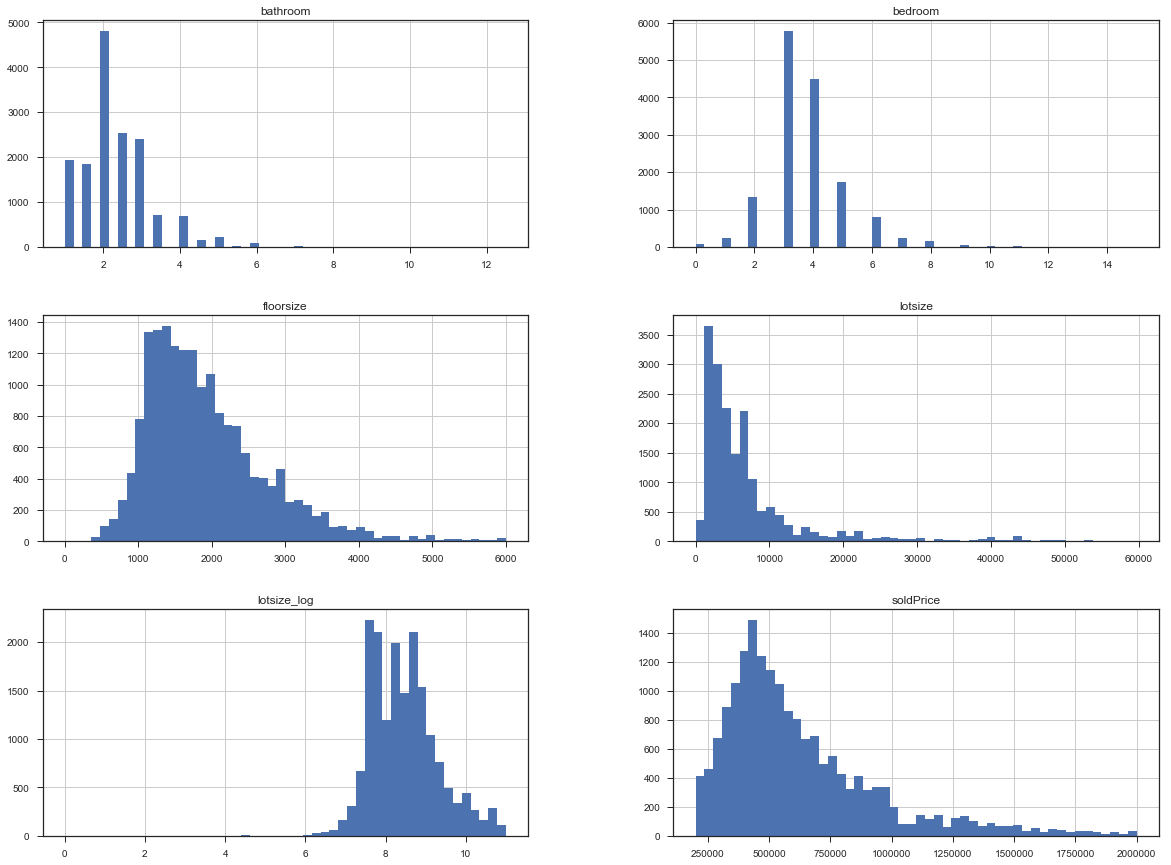

In [72]:
df_model1.hist(bins=50, figsize=(20,15))

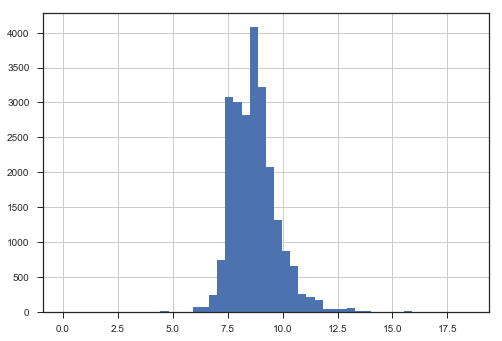

In [63]:
# lotsize log transformation
np.log(df_model1.lotsize).hist(bins=50)

In [69]:
# 3. add transformed lotsize_log
df_model1['lotsize_log'] = np.log(df_model1.lotsize)
df_model1.head()

,bathroom,bedroom,city,floorsize,lotsize,propertyType,soldPrice,county,lotsize_log
1,2.0,3.0,Bronx,1488.0,3300.0,Single Family Home,450000,Bronx,8.101678
2,2.0,3.0,Bronx,1370.0,1518.0,Multi-Family Home,479000,Bronx,7.325149
3,4.0,6.0,Bronx,3382.0,2015.0,Multi-Family Home,600000,Bronx,7.608374
4,3.0,5.0,Bronx,2850.0,3742.0,Multi-Family Home,790000,Bronx,8.227376
7,2.0,3.0,Bronx,1928.0,5000.0,Single Family Home,545000,Bronx,8.517193


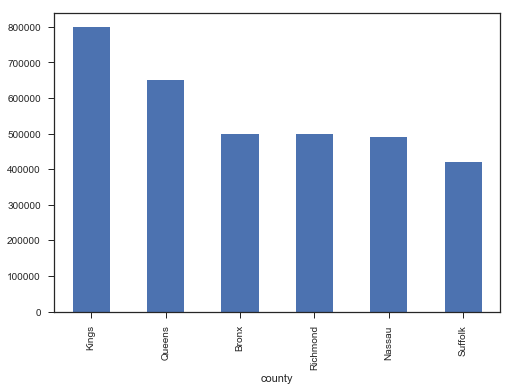

In [70]:
# 4. check categorical county vs. soldPrice
df_model1.groupby('county')['soldPrice'].median().sort_values(ascending=False).plot(kind='bar')

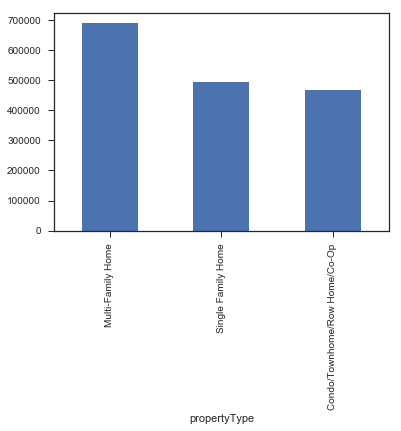

In [73]:
# 5. check categorical propertyType vs. soldPrice
df_model1.groupby('propertyType')['soldPrice'].median().sort_values(ascending=False).plot(kind='bar')

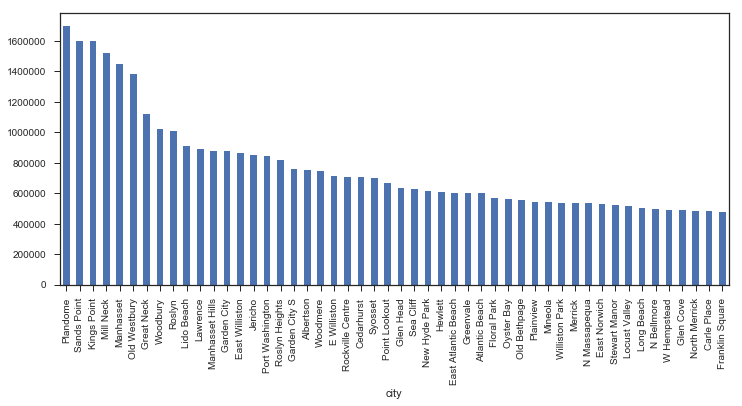

In [74]:
# check the 
df_model1.loc[(df_model1.county == 'Nassau') & (df_model1.propertyType == 'Single Family Home')].groupby('city')['soldPrice'].median().sort_values(ascending=False)[:50].plot(kind='bar',figsize=(12,5))

## 2.9 Check bivariates correlations

In [75]:
corr_mtr = df_model1.corr()
corr_mtr

,bathroom,bedroom,floorsize,lotsize,soldPrice,lotsize_log
bathroom,1.000000,0.566702,0.587756,0.146248,0.460643,0.113142
bedroom,0.566702,1.000000,0.511492,0.038993,0.327596,0.067569
floorsize,0.587756,0.511492,1.000000,0.180666,0.488039,0.156013
lotsize,0.146248,0.038993,0.180666,1.000000,0.054777,0.853368
soldPrice,0.460643,0.327596,0.488039,0.054777,1.000000,0.013212
lotsize_log,0.113142,0.067569,0.156013,0.853368,0.013212,1.000000


In [76]:

corr_mtr['soldPrice'].sort_values(ascending=False)[1:]

floorsize      0.488039
bathroom       0.460643
bedroom        0.327596
lotsize        0.054777
lotsize_log    0.013212
Name: soldPrice, dtype: float64

/Users/wanggene/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/wanggene/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


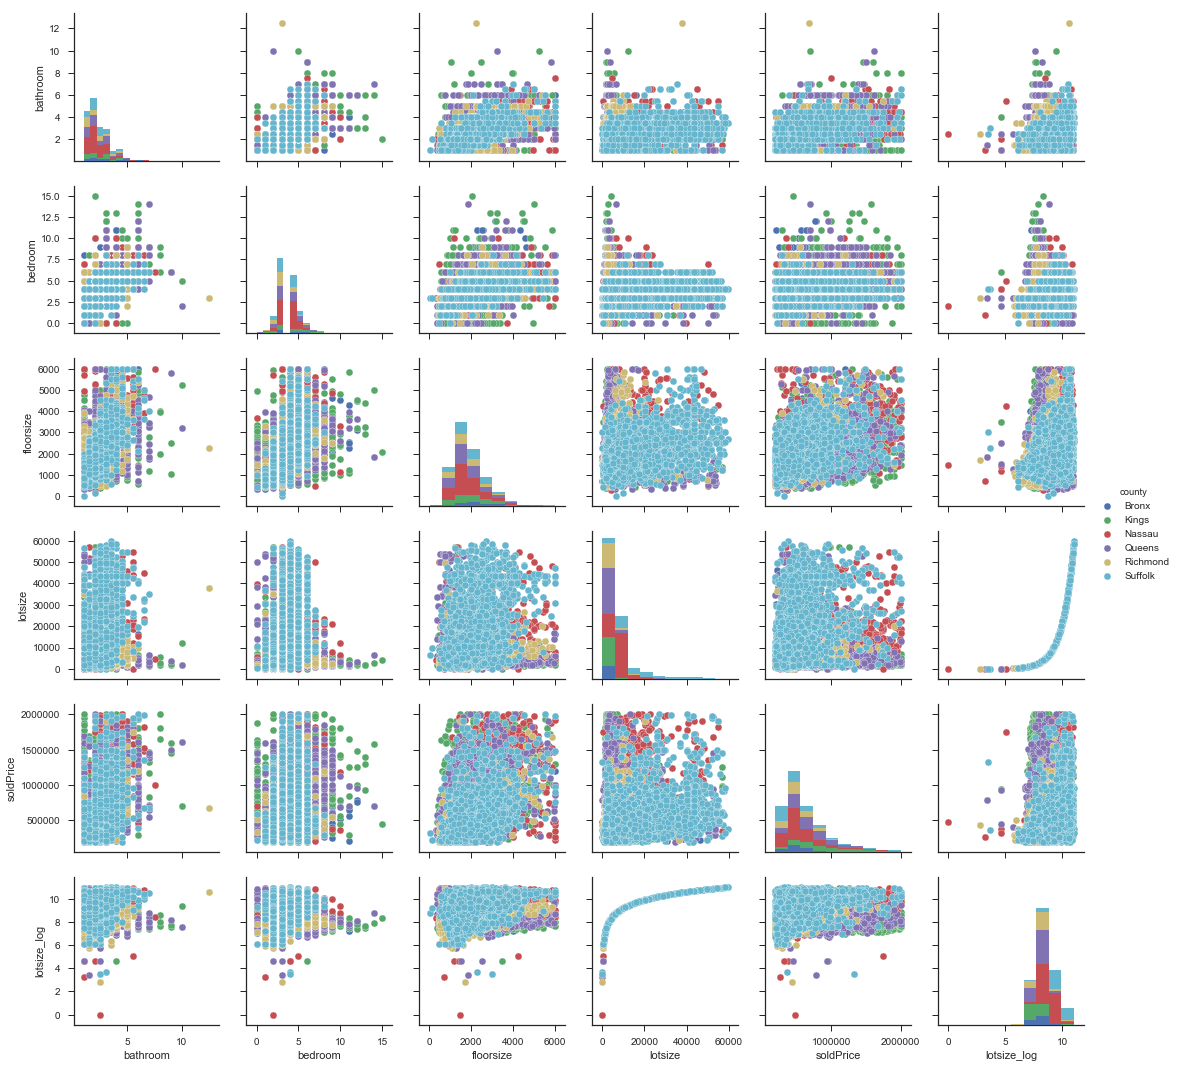

In [77]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_model1, hue="county")

# III. Modeling

## 3.1 Split the dataset into Training and Test 

In [78]:
model_features = ['bathroom', 'bedroom', 'floorsize', 'lotsize_log', 'propertyType','county']

X = df_model1[model_features]
y = df_model1.soldPrice
print(X.shape)
print(len(y))

(17839, 6)
17839


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(14271, 6) (3568, 6)


In [88]:
# check county and type proportion in train and test set
print(df_model1.county.value_counts()/len(df_model1))
print('='*50, 'training')
print(X_train.county.value_counts()/len(X_train))
print('='*50, 'test')
print(X_test.county.value_counts()/len(X_test))

Nassau      0.315993
Queens      0.217053
Suffolk     0.156735
Kings       0.127474
Richmond    0.122653
Bronx       0.060093
Name: county, dtype: float64
================================================== training
Nassau      0.316376
Queens      0.215052
Suffolk     0.157172
Kings       0.127111
Richmond    0.123747
Bronx       0.060542
Name: county, dtype: float64
================================================== test
Nassau      0.314462
Queens      0.225056
Suffolk     0.154989
Kings       0.128924
Richmond    0.118274
Bronx       0.058296
Name: county, dtype: float64


In [106]:
# check proportion
def prop_check(var, *data):
    for dataset in data:
        print(dataset[var].value_counts()/len(dataset))
        print("="*50, var)
        

In [107]:
data_lst = [X_train, X_test]
prop_check('county', *data_lst)

Nassau      0.316376
Queens      0.215052
Suffolk     0.157172
Kings       0.127111
Richmond    0.123747
Bronx       0.060542
Name: county, dtype: float64
================================================== county
Nassau      0.314462
Queens      0.225056
Suffolk     0.154989
Kings       0.128924
Richmond    0.118274
Bronx       0.058296
Name: county, dtype: float64
================================================== county


In [109]:
prop_check('propertyType', *data_lst)

Single Family Home               0.705837
Multi-Family Home                0.230047
Condo/Townhome/Row Home/Co-Op    0.064116
Name: propertyType, dtype: float64
================================================== propertyType
Single Family Home               0.696188
Multi-Family Home                0.232063
Condo/Townhome/Row Home/Co-Op    0.071749
Name: propertyType, dtype: float64
================================================== propertyType


## 3.2 Imputation

In [ ]:
def imp_num(data, method = 'median'):
    from sklearn.preprocessing import Imputer
    imputer = Imputer(strategy="median")  

In [110]:
# check missing value
print(X_train.isnull().sum())
print(X_train.shape)


bathroom        1898
bedroom         2300
floorsize          0
lotsize_log        0
propertyType       0
county             0
dtype: int64
(14271, 6)


### A. Impute the numeric cols

#### 1. manually impute the bathroom, bedroom missing value using median value

In [146]:
# impute the bathroom missing value with median with manual impute, 
# alternativly use mode to impute

df_model_sfh = X_train.copy()
bedroom_median = X_train.bedroom.median()
bathroom_median = X_train.bathroom.median()

df_model_sfh['bathroom'].fillna(bathroom_median, inplace=True)
df_model_sfh['bedroom'].fillna(bedroom_median, inplace=True)

df_model_sfh.isnull().sum()

bathroom        0
bedroom         0
floorsize       0
lotsize_log     0
propertyType    0
county          0
dtype: int64

#### 2. impute the bathroom missing value using Imputer

In [111]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [113]:
cat_cols = ['county', 'propertyType']
X_train_num = X_train.drop(cat_cols, axis=1)
X_train_cat = X_train[cat_cols]

In [114]:
imputer.fit(X_train_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [115]:
imputer.statistics_

array([    2.        ,     4.        ,  1758.        ,     8.39276311])

In [116]:
X_train_num_imputed = imputer.transform(X_train_num) 

In [119]:
X_train_num_imputed = pd.DataFrame(X_train_num_imputed, columns=X_train_num.columns,
                          index = list(X_train_num.index.values))

In [120]:
X_train_num_imputed.head()

,bathroom,bedroom,floorsize,lotsize_log
185,2.5,3.0,1354.0,6.214608
491,1.5,2.0,1354.0,6.214608
900,2.0,4.0,1120.0,7.878534
1543,2.0,4.0,830.0,8.817298
1750,2.5,3.0,1260.0,7.600902


In [121]:
X_train_num_imputed.isnull().sum()

bathroom       0
bedroom        0
floorsize      0
lotsize_log    0
dtype: int64

In [136]:
X_train_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 185 to 2041
Data columns (total 4 columns):
bathroom       14271 non-null float64
bedroom        14271 non-null float64
floorsize      14271 non-null float64
lotsize_log    14271 non-null float64
dtypes: float64(4)
memory usage: 557.5 KB


### B. Impute the categorical cols

In [122]:
X_train_cat.columns

Index(['county', 'propertyType'], dtype='object')

In [123]:
X_train_cat_encoded, X_train_cat_categories = X_train_cat['county'].factorize()

#### 1. Using OneHotEncoder

In [124]:
print(X_train_cat_encoded, X_train_cat_categories)

[0 0 1 ..., 3 5 4] Index(['Richmond', 'Queens', 'Kings', 'Nassau', 'Suffolk', 'Bronx'], dtype='object')


In [125]:
from sklearn.preprocessing import OneHotEncoder # impute OneHotEncoder with OneHotEncoder

encoder = OneHotEncoder()
X_train_cat_encoded_1hot = encoder.fit_transform(X_train_cat_encoded.reshape(-1,1)) # reshape(-1,1)
X_train_cat_encoded_1hot

<14271x6 sparse matrix of type '<class 'numpy.float64'>'
	with 14271 stored elements in Compressed Sparse Row format>

In [126]:
print(X_train_cat_encoded_1hot.shape)
print(type(X_train_cat_encoded_1hot))

(14271, 6)
<class 'scipy.sparse.csr.csr_matrix'>


In [134]:
# return the scipy matrix to a np.array
X_train_cat_encoded_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.]])

In [135]:
# the array only hotcoding the county variable
X_train_cat_encoded_1hot.shape

(14271, 6)

#### 2. Using CategoricalEncoder

In [129]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [137]:
# include only cunty
X_train_cat_county = X_train_cat['county']
X_train_cat_county_reshaped = X_train_cat_county.values.reshape(-1, 1)

In [138]:
cat_encoder = CategoricalEncoder()
X_train_cat_county_1hot = cat_encoder.fit_transform(X_train_cat_county_reshaped )
X_train_cat_county_1hot

<14271x6 sparse matrix of type '<class 'numpy.float64'>'
	with 14271 stored elements in Compressed Sparse Row format>

In [139]:
X_train_cat_county_1hot.toarray()

array([[ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

#### 3. CategoricalEncoder, onehot-dense

In [133]:
cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_county_1hot_dense = cat_encoder.fit_transform(X_train_cat_county_reshaped)
housing_cat_county_1hot_dense

array([[ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

#### 4. CategoricalEncoder, onehot-dense for all categorical variables (county and propertytype)

In [162]:
X_train_cat_reshaped = X_train_cat.values.reshape(-1, 1)
cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_1hot_dense = cat_encoder.fit_transform(X_train_cat_reshaped) 
#housing_cat_1hot_dense = cat_encoder.fit_transform(X_train_cat)
housing_cat_1hot_dense

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [161]:
cat_encoder.categories_

[array(['Bronx', 'Kings', 'Nassau', 'Queens', 'Richmond', 'Suffolk'], dtype=object),
 array(['Condo/Townhome/Row Home/Co-Op', 'Multi-Family Home',
        'Single Family Home'], dtype=object)]

In [163]:
cat_encoder.categories_

[array(['Bronx', 'Condo/Townhome/Row Home/Co-Op', 'Kings',
        'Multi-Family Home', 'Nassau', 'Queens', 'Richmond',
        'Single Family Home', 'Suffolk'], dtype=object)]

##  3.3 Create a custom transformer to add extra attributes

## 3.4 build a pipeline for preprocessing the attributes

#### 1. pipeline for numeric attributes

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),         # the imputation of numeric variables
        ('std_scaler', StandardScaler()),                # standardize or scaling
    ])

X_train_num_tr = num_pipeline.fit_transform(X_train_num) # do all steps in the housing_num 
X_train_num_tr.shape

(14271, 4)

In [148]:
X_train_num_tr

array([[ 0.25340127, -0.62863236, -0.6929475 , -2.67679302],
       [-0.87334417, -1.45175488, -0.6929475 , -2.67679302],
       [-0.30997145,  0.19449017, -0.97766507, -0.69838754],
       ..., 
       [ 2.50689213,  1.01761269,  3.74329286,  1.711512  ],
       [-0.30997145,  0.19449017,  1.37064648,  0.06097699],
       [-1.43671688, -0.62863236, -1.21492971,  1.07800826]])

#### 2. transformer to just select a subset of the Pandas DataFrame columns

In [165]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

#### 3. transformer both numeric and categorical attributes

In [166]:
num_attribs = list(X_train_num.columns)              # numeric variables
cat_attribs = list(X_train_cat.columns)              # categorical variables

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),  #c   # selection: select the num_attribs 
        ('imputer', Imputer(strategy="median")),            # imputation: with mediam value
        ('std_scaler', StandardScaler()),                   # scaling: using standardscaling
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),   #c
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),  #c
    ])

In [167]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),          # NUMBERIC PIPELINE
        ("cat_pipeline", cat_pipeline),          # CATEGORICAL PIPELINE
    ])

In [175]:
X_train_prep = full_pipeline.fit_transform(X_train)
print(X_train_prep.shape)
print(y_train.shape)

(14271, 13)
(14271,)


## 3.5 Training the models

#### 1. Linear Regression

In [171]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train)  
# X: X_train_prepared
# y: y_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
# let's try the full pipeline on a few training instances
X_some_data = X_train.iloc[:5]
y_some_data = y_train.iloc[:5]
some_data_prepared = full_pipeline.transform(X_some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Actual Labels:", list(y_some_data))

Predictions: [ 353664.  297216.  564352.  609280.  766592.]
Actual Labels: [370000, 320000, 315000, 515000, 785000]


In [174]:
from sklearn.metrics import mean_squared_error          # Import mse class

X_train_predictions = lin_reg.predict(X_train_prep)  # make the prediction
lin_mse = mean_squared_error(y_train, X_train_predictions)  # calculate mse
lin_rmse = np.sqrt(lin_mse)     # claculate rmse   (l2 norm)
lin_rmse

240376.57847458415

In [178]:
from sklearn.metrics import mean_absolute_error       # Import mae class

lin_mae = mean_absolute_error(y_train, X_train_predictions)  # calculate mae (l1 norm)
lin_mae 

167920.73603811927

#### 2 . Decision Tree

In [180]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_prep, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [181]:
X_train_predictions = tree_reg.predict(X_train_prep)
tree_mse = mean_squared_error(y_train, X_train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

23350.246587818503

#### 3. Enseble.RandormForestRegressor

In [183]:
from sklearn.ensemble import RandomForestRegressor  # There is no CV

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_prep, y_train)

X_train_predictions = forest_reg.predict(X_train_prep)
rf_mse = mean_squared_error(y_train, X_train_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

107829.30962951775

## 3.6 Training the models + CV